<a href="https://colab.research.google.com/github/ckkhoo/AboutMe/blob/master/Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **A. Business Understanding**

The business we will be analysing is called Wish.com, an online e-commerce platform where transactions are made simpler between sellers and buyers. Wish was founded in 2010 by Peter Szulczewski and Danny Zhang, former developers of Google and Yahoo (Wish - News and information, 2019). It was first launched as a wishlist creating app where the users can create wishlist of their favourite products and was monetized using a pay-per-click model (Hollis, 2018). As their company has grown, Wish began selling similar items based on their users existing wishlists. This led to collaborations with some merchants who directly delivered their goods through the Wish platform. By linking the third-party sellers with customers through Wish.com, it turned out to be the business model that would support the company's growth moving forward. Through the next few years of funding, Wish took in $1.3 billion and grew their wishlist app into a complete online e-commerce platform (Hollis, 2018).
 
The competitive advantages that Wish has against its competitors is the price of their products. Most of the famous e-commerce companies focus first on the users shopping experience rather than focus on the price of the products. Wish takes a radically different approach, with an emphasis on discounted and unbranded products. Most of the products in Wish are priced 80 or 90% off their original price, making them particularly enticing to the frugal shoppers. For each product sold, the company will only get 15 percent of the sale, which means they will have to sell a ton of products to reach the billion dollar mark. And even though the products sold are so cheap, the company revenue is still increasing through the years (The real reason Wish products are so cheap, 2020). This is because Wish cut out the middleman. Instead of delivering the products to a warehouse in the United States first, and then branding the products and selling at a price that requires to cover the marketing and services costs, the sellers deliver the products directly from the manufacturer to the customer's doorstep to decrease the costs. 

Objectives:
  *   To identify the most profitable product.
  *   To forecast which product should be restocked and how many units to order.

Constraints:
  *   The empty values in the data rows would affect the accuracy of forecasting, for example an order without the quantity of product may affect the outcome of monthly sales performance. 
  *   Poor quality and inaccurate data such as product_size may affect the outcome of forecasting due to inconsistent format of product sizes, it may lead to serious negative consequences if the evaluation is used to influence important decision.

Business problems:   
  *   Which product brings the most sales and profit?
  *   Which successful product should be restocked and how many units to order?
 
Goals: 
  *   To predict the successful products.
  *   To predict the product stock management.








# **B. Data Understanding**

During this stage, we are required to acquire the data listed in the project resources. The source of the data resources used in our project is found on the Kaggle website which is titled "Sales of summer clothes in E-commerce Wish". The dataset is a study on top products requires more than just product listings. From the dataset, we can know that the detailed product listings which include product ratings and sales performance. With the following information provided, we can start searching for similarities and trends about the performance of the product and the different components. Regarding the data collection methodology, the data is collected from the Wish platform. The data can be searched easily through the search bar since the products are categorized in the "Summer" category.

Based on the dataset, there are many useful data that can be used on our research. Below is the data listing that are acquired from the dataset.

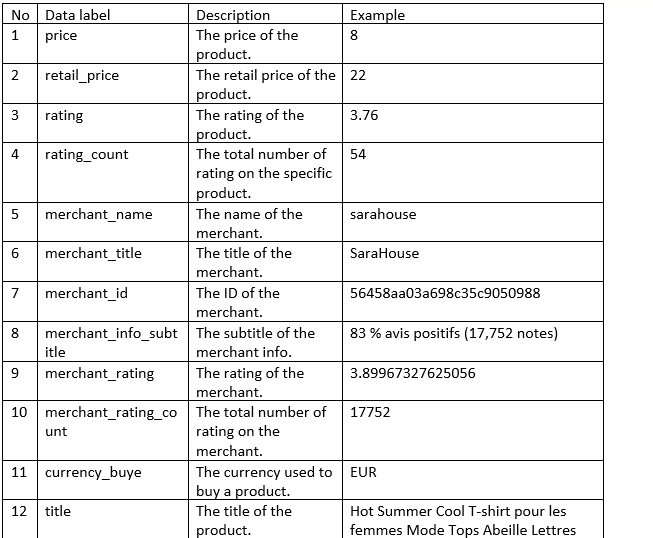
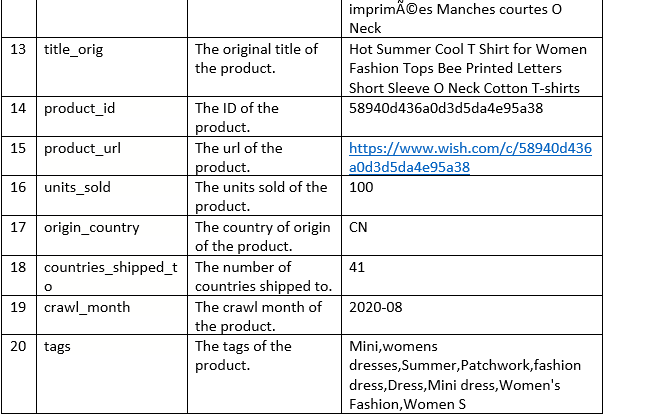

In order to carry out our research, we have selected some of the data that are able to meet the requirements. For example, we have choose the units_sold, price, and retail_price as the required data for the prediction on determining which products are able to bring more profits to the organization.





## **Data Description**

In this task, we will be identifying the characteristics that make a product sell.

In the end, we built a simple linear regression model that indicates which products are more likely to return profit based on the predicted sold_units and the difference between retail price and price.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px
import re
from functools import reduce

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

sns.set()

In [ ]:
# The original data
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/Bachelor's Degree/Y3S1/DataScience/summer-products-with-rating-and-performance_2020-08.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(1573, 43)

In [ ]:
df.dtypes

title                            object
title_orig                       object
price                           float64
retail_price                      int64
currency_buyer                   object
units_sold                        int64
uses_ad_boosts                    int64
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product               int64
badge_product_quality             int64
badge_fast_shipping               int64
tags                             object
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_name             object
shipping_option_price             int64
shipping_is_express               int64


## **Exploratory data analysis (EDA)**

In [ ]:
df.head().T

,0,1,2,3,4
title,2020 Summer Vintage Flamingo Print Pajamas Se...,SSHOUSE Summer Casual Sleeveless Soirée Party ...,2020 Nouvelle Arrivée Femmes Printemps et Été ...,Hot Summer Cool T-shirt pour les femmes Mode T...,Femmes Shorts d'été à lacets taille élastique ...
title_orig,2020 Summer Vintage Flamingo Print Pajamas Se...,Women's Casual Summer Sleeveless Sexy Mini Dress,2020 New Arrival Women Spring and Summer Beach...,Hot Summer Cool T Shirt for Women Fashion Tops...,Women Summer Shorts Lace Up Elastic Waistband ...
price,16,8,8,8,2.72
retail_price,14,22,43,8,3
currency_buyer,EUR,EUR,EUR,EUR,EUR
units_sold,100,20000,100,5000,100
uses_ad_boosts,0,1,0,1,1
rating,3.76,3.45,3.57,4.03,3.1
rating_count,54,6135,14,579,20
rating_five_count,26,2269,5,295,6


### Dropping duplicates

In [ ]:
df.duplicated().sum()

34

In [ ]:
df.drop_duplicates(inplace=True)
raw_df = df.copy() # Copy of the original Data after dropping the duplicates

### Checking missing values

In [ ]:
fig = px.bar(df.isna().sum().sort_values().reset_index(), x="index", y=0, title="Evaluating Missing values")
fig.update_layout({"yaxis": {"title": "Missing values"}})
fig.show()

# **C. Data Preparation**


## **Checking columns individually**

 > ### *merchant_profile_picture* and *merchant_has_profile_picture*

The column "merchant_profile_picture" contains a link for the profile picture. No information can be easily obtained from here, unless we would do something with the pixels of the pictures, which we decided not to go that far. Since there is already a column indicating if the merchant has a profile picture, we will just check if that column matches this one and if so, discard the merchant_profile_picture columns.

In [ ]:
df["merchant_profile_picture"].unique()

array([nan,
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5652f4053a698c76dc9a3f37.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55ed5a3362e273427107759e.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_539937d634067e06707b1a8e.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_57108cd6a995b507211ef8fb.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5268759b736046671957190c.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_5660e53e769a564b3e3aeca0.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_55e7e41e606d0a18fdfc67d1.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_580f06685250a20783d33e56.jpg',
       'https://s3-us-west-1.amazonaws.com/sweeper-production-merchantimage/dp_577fb2b368116418674befd9.jpg'

In [ ]:
print(df.loc[df["merchant_profile_picture"].isna(), "merchant_has_profile_picture"].unique())
print(df.loc[~df["merchant_profile_picture"].isna(), "merchant_has_profile_picture"].unique())

[0]
[1]


In [ ]:
df.drop(["merchant_profile_picture"], axis=1, inplace=True)


 > ### *has_urgency_banner* and *urgency_text*



It seems that there are only *urgency_text* in French, one indicating limited quantity and another indicating price reduction. Only one of them is "Réduction sur les achats en gros", as seen bellow. We wil check if this column matches the *has_urgency_banner*, and if so, discard this column.

The column *has_urgency_banner* has values either 1 or NaN, so we will turn the NaN values of this column into 0.

In [ ]:
df["has_urgency_banner"].value_counts()

1.0    468
Name: has_urgency_banner, dtype: int64

In [ ]:
df["urgency_text"].value_counts()

Quantité limitée !                  467
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

In [ ]:
print(df.loc[df["has_urgency_banner"].isna(), "urgency_text"].unique())
print(df.loc[~df["has_urgency_banner"].isna(), "urgency_text"].unique())

[nan]
['Quantité limitée !' 'Réduction sur les achats en gros']


In [ ]:
df.drop(["urgency_text"], axis=1, inplace=True)
df["has_urgency_banner"] = df["has_urgency_banner"].fillna(0)

### **Checking product ratings**
In this section we will check the columns:

*   rating_one_count
*   rating_two_count
*   rating_third_count
*   rating_fourth_count
*   rating_five_count
*   rating
*   rating_count

The first 5 columns have missing values. They turned out to be products without any rating, although for some reason the rating of these products is 5, even though they have a rating_count of 0.

For these products, we will change the rating and all the rating counts to 0, indicating that they did not get any votes yet.

In [ ]:
rating_cols = ["rating_one_count", "rating_two_count", "rating_three_count", "rating_four_count", "rating_five_count", "rating", "rating_count"]

no_vote_df = df.loc[df[rating_cols].isna().any(axis=1), rating_cols]

df.loc[no_vote_df.index, rating_cols] = 0

df.loc[no_vote_df.index, rating_cols].head()

,rating_one_count,rating_two_count,rating_three_count,rating_four_count,rating_five_count,rating,rating_count
74,0.0,0.0,0.0,0.0,0.0,0.0,0
112,0.0,0.0,0.0,0.0,0.0,0.0,0
126,0.0,0.0,0.0,0.0,0.0,0.0,0
189,0.0,0.0,0.0,0.0,0.0,0.0,0
216,0.0,0.0,0.0,0.0,0.0,0.0,0


> ### *origin_country* and *countries_shipped_to*

The great majority of the dataset has origin in CN. This column has a really low variance, and so we will discard it, given that there is no statistical significant information that we can obtain from it.

*countries_shipped_to* is a numerical value.

In [ ]:
df["origin_country"].value_counts()

CN    1484
US      31
VE       4
SG       2
GB       1
AT       1
Name: origin_country, dtype: int64

In [ ]:
df["countries_shipped_to"].value_counts()

41    169
43    167
40    104
38     74
36     63
     ... 
67      1
66      1
65      1
64      1
6       1
Name: countries_shipped_to, Length: 94, dtype: int64

In [ ]:
df.drop("origin_country", axis=1, inplace=True)

 > ### *merchant_id*, *merchant_info_subtitle*, *merchant_title* and *merchant_name*, *merchant_rating*, *merchant_rating_count*

*   *merchant_id* is a a single id for each merchant and will be discarded
*   *merchant_title* does not seem to contain much information and will be discarded
*   *merchant_name* is just the name and will be discarded
*   *merchant_info_subtitle* contains the same information as *merchant_rating_count* and another evaluation metric that does not seem to be the same as *merchant_rating*. Ultimately this column will be discarded.

In [ ]:
df["merchant_id"].value_counts()

558c2cdc89d53c4005ea2920    14
5acaf29d5ebcfd72403106a8    12
5533c83986ff95173dc017d0     8
583138b06339b410ab9663ec     8
564d8a9ac0f55a1276cd96f8     8
                            ..
58ffff331a1cef16a78c78f4     1
5e0b55766a4343d3823c7215     1
5bdc1408c23b3222e81f3936     1
58be241991fd205b2462acc3     1
5b8e19ad9058ed22fdc30621     1
Name: merchant_id, Length: 958, dtype: int64

In [ ]:
df["merchant_title"].value_counts()

guangzhouweishiweifushiyouxiangongsi        14
Suyi Technology                             12
Sangboo Store                                8
sjhdstoer                                    8
shuilingjiao international trade company     8
                                            ..
Top 1 toYOU                                  1
Unique Li Fashion Shop                       1
chenzhiqiang11                               1
BENNA                                        1
Your Fashion 2016                            1
Name: merchant_title, Length: 958, dtype: int64

In [ ]:
df["merchant_info_subtitle"].value_counts()

83 % avis positifs (32,168 notes)        13
86 % avis positifs (12,309 notes)        11
87 % avis positifs (42,919 notes)         8
86 % avis positifs (65,189 notes)         6
85 % avis positifs (80,093 notes)         6
                                         ..
88 % avis positifs (24,132 notes)         1
86% Positive Feedback (3,271 ratings)     1
(8,352 notes)                             1
85 % avis positifs (1,181 notes)          1
92 % avis positifs (2,736 notes)          1
Name: merchant_info_subtitle, Length: 1058, dtype: int64

In [ ]:
df[["merchant_info_subtitle", "merchant_rating_count", "merchant_rating"]]

,merchant_info_subtitle,merchant_rating_count,merchant_rating
0,(568 notes),568,4.128521
1,"83 % avis positifs (17,752 notes)",17752,3.899673
2,86 % avis positifs (295 notes),295,3.989831
3,"(23,832 notes)",23832,4.020435
4,"85 % avis positifs (14,482 notes)",14482,4.001588
...,...,...,...
1568,"90 % avis positifs (5,316 notes)",5316,4.224605
1569,"(4,435 notes)",4435,3.696054
1570,86 % avis positifs (210 notes),210,3.961905
1571,77 % avis positifs (31 notes),31,3.774194


In [ ]:
df.drop(["merchant_id", "merchant_title", "merchant_name", "merchant_info_subtitle"], axis=1, inplace=True)

 > ### *currency_buyer*

All the currency is in Euro, so this column will be droped.


In [ ]:
df["currency_buyer"].value_counts()

EUR    1539
Name: currency_buyer, dtype: int64

In [ ]:
df.drop("currency_buyer", inplace=True, axis=1)

> ### *tags*, *title*, *title_orig*

These are tags. A lot of interesting features can be drawn from here, together with the titles. We will combine these three columns, and then try to create classes from the obtained words using NLP.

We will also create a column for the number of tags for each product.

In [ ]:
# Number of tags
df["n_tags"] = df["tags"].apply(lambda x: len(x.split(",")))

**Preprocessing the tags**

In [ ]:
swords = stopwords.words('english')

def clean_text(s: str) -> str:
    """ Cleans the strings from the titles and the tags"""
    
    # Only Keep letters
    processed_s = re.sub(r"[^a-z]", " ", s.lower())
    
    ps = PorterStemmer()
    
    # stemmed words with Porter Stemmer lemmatization
    stemmed_s = [ps.stem(s) for s in processed_s.split()]
    
    unique_tags = list(set(stemmed_s))
    
    # Filter stop words
    cleaned_text = [w for w in unique_tags if (w not in swords and len(w) > 2)]
    
    return cleaned_text

all_tags = (df["tags"] + df["title"] + df["title_orig"]).values
processed_tags = [clean_text(s) for s in all_tags]

**Check all the unique tags**

There are 3987 unique tags in this dataset.

In [ ]:
len(set(reduce(lambda a,b : a+b, processed_tags)))

3987

**Creating Columns for the relevant tags**

We wil now use the created tags to create binary columns with the information that we want. Some of these columns can be:

*   Men
*   Women
*   Shirt
*   Robe
*   Pajamas 
*   etc..

In [ ]:
# Each of these will be a binary column
tags_list = [
    r"\bmen",
    r"\bwomen",
    "shirt",
    "robe",
    "dress",
    "skirt",
    "underwear",
    "swim",
    "nightwear",
    "sleepwear",
    "shorts"
]

def build_tags_dict(tags_list_per_product: list) -> dict:
    """ Returns a dict with 0 or 1, any of the tags_list were found on the tags per sample"""
    return {tag.lstrip('\\b'): any(re.findall(tag, " ".join(tags_list_per_product))) for tag in tags_list}

**Testing the function created**

In [ ]:
testing_set = processed_tags[3]
print(build_tags_dict(testing_set))
print()
print(testing_set)

{'men': False, 'women': True, 'shirt': True, 'robe': False, 'dress': False, 'skirt': False, 'underwear': False, 'swim': False, 'nightwear': False, 'sleepwear': False, 'shorts': False}

['shirt', 'abeil', 'cotton', 'print', 'short', 'summer', 'femm', 'cool', 'women', 'fashion', 'tementshot', 'mode', 'court', 'manch', 'sleev', 'letter', 'tee', 'cloth', 'shirthot', 'tshirtforwomen', 'printedletterstop', 'top', 'pour', 'lettr', 'imprim', 'coton', 'bee', 'neck']


In [ ]:
cols_df = pd.DataFrame([build_tags_dict(t) for t in processed_tags])
cols_df.head()

,men,women,shirt,robe,dress,skirt,underwear,swim,nightwear,sleepwear,shorts
0,False,True,True,False,False,False,True,False,True,True,True
1,False,True,False,True,True,False,False,False,False,False,False
2,False,True,False,False,False,False,False,True,False,False,False
3,False,True,True,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,False


In [ ]:
df = df.merge(cols_df, left_index=True, right_index=True)

In [ ]:
test_index = np.random.randint(df.shape[0])
df.loc[test_index, cols_df.columns.values.tolist() + ["title", "tags", "title_orig"]].to_dict()

{'dress': True,
 'men': False,
 'nightwear': False,
 'robe': True,
 'shirt': False,
 'shorts': False,
 'skirt': False,
 'sleepwear': False,
 'swim': False,
 'tags': "Summer,Fashion,Mini,Tops,Loose,Polkas,V-neck,Women's Fashion,backless,polka dot,Dress,sleeveless,Casual",
 'title': "Mode d'été pour femmes Nouveau sans manches à pois Col en V Sangle Mini Backless Casual Top Robes",
 'title_orig': "Summer Women's Fashion New Sleeveless Polka Dot V-neck Strap Mini Backless Casual Top Dresses",
 'underwear': False,
 'women': True}

**Check how frequently is the title the same as the original title**


In [ ]:
(df["title"].str.lower() == df["title_orig"].str.lower() ).sum()

149

Since we have custom tag columns, we have decided to drop *tags*, *title*, and *title_orig* as we no longer need them

In [ ]:
df.drop(["tags", "title", "title_orig"], axis=1, inplace=True)

> ### *themes*, *crawl_month* and *shipping_option_name*

Can be removed because the only contain one value or very few values.


In [ ]:
df["theme"].value_counts()

summer    1506
Name: theme, dtype: int64

In [ ]:
df["crawl_month"].value_counts()

2020-08    1506
Name: crawl_month, dtype: int64

In [ ]:
df["shipping_option_name"].value_counts()

Livraison standard         1443
Standard Shipping            20
Envio Padrão                  8
Expediere Standard            6
Envío normal                  5
الشحن القياسي                 4
Livraison Express             3
Standardversand               3
Standardowa wysyłka           3
Стандартная доставка          3
Standart Gönderi              2
Spedizione standard           2
การส่งสินค้ามาตรฐาน           2
Ekspresowa wysyłka            1
ការដឹកជញ្ជូនតាមស្តង់ដារ       1
Name: shipping_option_name, dtype: int64

In [ ]:
df.drop(["theme", "crawl_month", "shipping_option_name"], axis=1, inplace=True)

 > ### *product_id* and *product_url*

*   *product_id* is ids for each product and will be discarded.
*   *product_url* does not seem to contain much information and will be discarded.

In [ ]:
df.drop("product_id", inplace=True, axis=1)
df.drop("product_url", inplace=True, axis=1)

## **Convert binary columns to boolean**

As a final step, we will convert all the binary columns to boolean.

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,1506.0,8.364070,3.944166,1.000000,5.822500,8.00000,11.000000,49.0
retail_price,1506.0,23.278884,30.235739,1.000000,7.000000,10.00000,26.000000,252.0
units_sold,1506.0,4449.433599,9508.135998,1.000000,100.000000,1000.00000,5000.000000,100000.0
uses_ad_boosts,1506.0,0.436255,0.496085,0.000000,0.000000,0.00000,1.000000,1.0
rating,1506.0,3.682151,0.786841,0.000000,3.500000,3.82000,4.080000,5.0
rating_count,1506.0,910.819389,2012.895276,0.000000,25.000000,161.50000,874.500000,20744.0
rating_five_count,1506.0,440.144754,983.932454,0.000000,11.000000,77.00000,408.000000,11548.0
rating_four_count,1506.0,178.604250,401.723098,0.000000,4.000000,30.50000,165.000000,4152.0
rating_three_count,1506.0,133.705179,312.255959,0.000000,4.000000,23.00000,125.750000,3658.0
rating_two_count,1506.0,63.285525,151.439303,0.000000,2.000000,11.00000,61.000000,2003.0


In [ ]:
to_bool_cols = ["uses_ad_boosts", "shipping_is_express", "badge_local_product", "badge_product_quality", "has_urgency_banner", "merchant_has_profile_picture"]
df[to_bool_cols] = df[to_bool_cols].astype(bool)

In [ ]:
df.dtypes

price                           float64
retail_price                      int64
units_sold                        int64
uses_ad_boosts                     bool
rating                          float64
rating_count                      int64
rating_five_count               float64
rating_four_count               float64
rating_three_count              float64
rating_two_count                float64
rating_one_count                float64
badges_count                      int64
badge_local_product                bool
badge_product_quality              bool
badge_fast_shipping               int64
product_color                    object
product_variation_size_id        object
product_variation_inventory       int64
shipping_option_price             int64
shipping_is_express                bool
countries_shipped_to              int64
inventory_total                   int64
has_urgency_banner                 bool
merchant_rating_count             int64
merchant_rating                 float64


# **D. Modelling**

## **Linear Regression**

The first model we are using linear regression. It is a very fast and simple model that can give us a quick glimpse to understand the model easily before applying other models.

### **Correlation**

Before applying model, we would need to identify the correlations among the attributes.

In [ ]:
cont_cols = df.select_dtypes(exclude="bool").columns
bool_cols = df.select_dtypes("bool").columns

In [ ]:
px.imshow(df[cont_cols].corr(), width=500, height=500)

Based on the graph above, a strong correlation among the Rating count and the five indivudual score counts is identified. Due to this the five individuals score counts will be removed.

In [ ]:
df.drop(["rating_five_count", "rating_four_count", "rating_three_count", "rating_two_count", "rating_one_count"], axis=1, inplace=True)

In this section, we will be analyzing the trends of the unit sold based on other attribtues using Linear Regression model.

We select the five attributes that we think are important attributes to be analysed. These attributes are price, units_sold, rating, merchant_rating, and rating_count.

In [ ]:
scatter_matrix_cols = ["price", "units_sold", "rating", "merchant_rating", "rating_count"]
px.scatter_matrix(df[scatter_matrix_cols], width=1000, height=1000)

After this, we identify the R-Squared of the regression analysis model, which can be used to determine the relevence of the linear model to the observation set. 

In [ ]:
new_df = df.drop(["product_color", "product_variation_size_id", "product_picture"], axis=1)

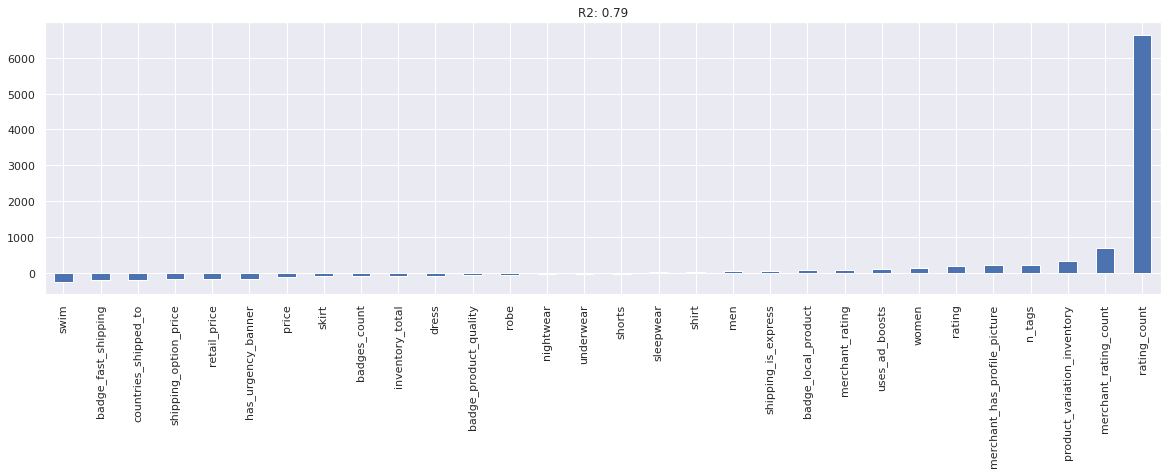

In [ ]:
X = new_df.drop("units_sold", axis=1)
y = new_df["units_sold"]
reg = make_pipeline(StandardScaler(), ElasticNet(alpha=0.5))
reg.fit(X, y)
pd.Series(reg[-1].coef_, index=X.columns).sort_values().plot.bar(figsize=(20, 5))

r2 = r2_score(y, reg.predict(X))
plt.title(f"R2: {round(r2, 2)}")
plt.show()

The value of R-Squared = 79% shows the model is fairly fitted to the regression line. However the graph shows that the rating_count is significant for the unit_sold, an explanation could be that the product has been listed for longer perions, hence have sold more and thus more rating. For this reason, our cur

In [ ]:
no_counts_df = new_df.drop(["rating_count", "merchant_rating_count"], axis=1)


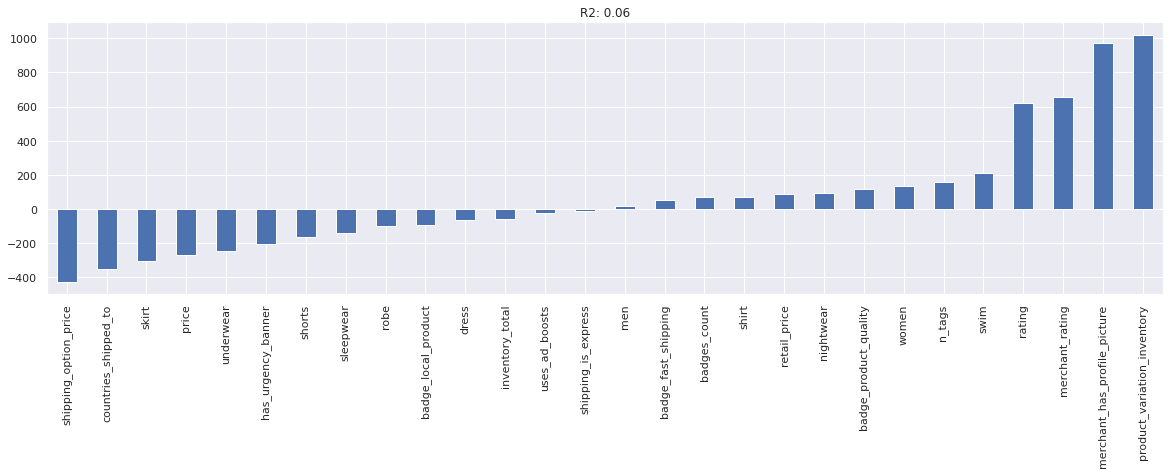

In [ ]:
X = no_counts_df.drop("units_sold", axis=1)
y = no_counts_df["units_sold"]
reg = make_pipeline(StandardScaler(), ElasticNet(alpha=0.5))
reg.fit(X, y)
pd.Series(reg[-1].coef_, index=X.columns).sort_values().plot.bar(figsize=(20, 5))

r2 = r2_score(y, reg.predict(X))
plt.title(f"R2: {round(r2, 2)}")
plt.show()

A major change of R-Squared can be observed after the removal of rating_count and merchant_rating_count. The R-Squared = 7% shows the model (without the two removed columns) failed to follow the regression line, which makes it significantly harder to predict a reasonable precise deterministic outcome.

**Linear regression conclusion**

In this section, using Linear Regression it is revealed that the rating_count of a product gives the most impact to the unit_sold, thus the most important factor for predicting the number of units sold.

However, in our opinion we believe this might not necessary be relevant. Because the rating_count might merely implies that the product has been up for sales for longer period than other products.

Furthermore, after removing the rating_count and merchant_rating_count, the R-Squared value dropped from 72% to 6%, shows that the remaining attributes (as well as other tages we created) does not contribute much to the impact of sales.

## Other various models

In this heading section, we will be implementing many models for training. We do it due to the ease of implementation of each model, and want to find out which model would perform best for the following evaluation.

The model we will be using are AdaBoost, AdaBoost - Random Forest, Decision Tree, Gradient Boosting, KNeighborsClassifier, Random Forest, SVC, and XG Boost.

In [ ]:
# Load libraries
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [ ]:
r_state = 3
X = new_df.drop(['units_sold'], axis = 1)
y = new_df['units_sold']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = r_state)

**Decision Tree**

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score

classifier_DTC = DecisionTreeClassifier(random_state = r_state)
classifier_DTC.fit(X_train, y_train)

y_pred_DTC = classifier_DTC.predict(X_test)
accuracy_score(y_test, y_pred_DTC)

0.6390728476821192

**Support Vector Machines (SVM.SVC)**

In [ ]:
from sklearn.svm import SVC

classifier_SVC = SVC(random_state = r_state)
classifier_SVC.fit(X_train, y_train)

y_pred_SVC = classifier_SVC.predict(X_test)
accuracy_score(y_test, y_pred_SVC)

0.3609271523178808

**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

classifier_ABC = AdaBoostClassifier(learning_rate = 0.01,
                                   random_state = r_state) # Default using Decision Tree Classifier
classifier_ABC.fit(X_train, y_train)

y_pred_ABC = classifier_ABC.predict(X_test)
accuracy_score(y_test, y_pred_ABC)

0.4966887417218543

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_RFC = RandomForestClassifier(random_state = r_state)
classifier_RFC.fit(X_train, y_train)

y_pred_RFC = classifier_RFC.predict(X_test)
accuracy_score(y_test, y_pred_RFC)

0.7119205298013245

**AdaBoost - Random Forest**

In [ ]:
classifier_ABC_RF = AdaBoostClassifier(RandomForestClassifier(random_state = r_state),
                                       learning_rate = 0.01,
                                       random_state = r_state) 
classifier_ABC_RF.fit(X_train, y_train)

y_pred_ABC_RF = classifier_ABC_RF.predict(X_test)
accuracy_score(y_test, y_pred_ABC_RF)

0.7119205298013245

**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

classifier_GBC = GradientBoostingClassifier(random_state = r_state)
classifier_GBC.fit(X_train, y_train)

y_pred_GBC = classifier_GBC.predict(X_test)
accuracy_score(y_test, y_pred_GBC)

0.7119205298013245

**KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier_KNN = KNeighborsClassifier(n_neighbors = 5)
classifier_KNN.fit(X_train, y_train)

y_pred_KNN = classifier_KNN.predict(X_test)
accuracy_score(y_test, y_pred_KNN)

0.5662251655629139

**XG Boost**

In [ ]:
from xgboost import XGBClassifier

classifier_XGB = XGBClassifier()
classifier_XGB.fit(X_train, y_train)

y_pred_XGB = classifier_XGB.predict(X_test)
accuracy_score(y_test, y_pred_XGB)

0.7086092715231788

# **E. Evaluation**

In this section, we will evaluate the models used in D. Modelling with two different approaches. For Linear Regression model, we will be using it to apply solution for solving the business objective of Wish.com, which is to predict the most potential selling product in order to restock.

For the various models applied, we will be using Confusion Matrix to cross validate the accuracy of each models, and identify which of the models are best suited for the prediction of business.

## **Applying Linear Regression model**

The number of units sold will be multiplied by the difference between price and retail price.

To indicate if more of some product should be restock, then the predicted sold amount will be subtracted from the number of units currently in stock.

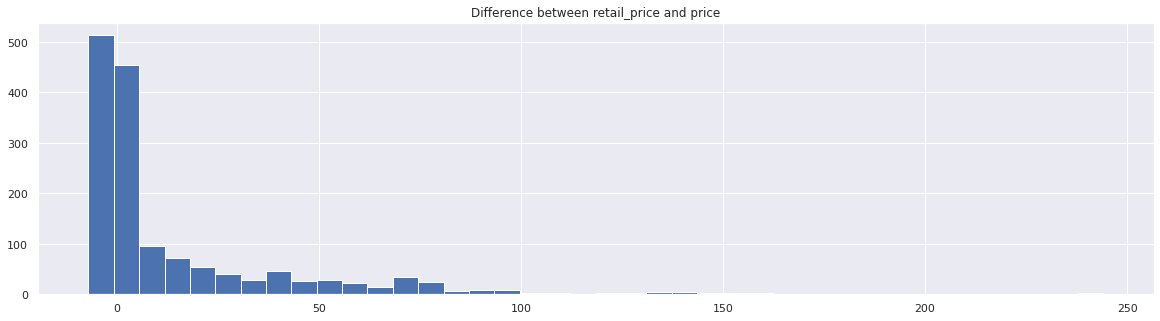

In [ ]:
df["profit"] = df["retail_price"] - df["price"]
df["profit"].hist(bins=40, figsize=(20, 5))
plt.title("Difference between retail_price and price")
plt.show()

Some interesting observation found in the graph is that, some products have negative relation between retail_price and price. This indicates that the seller is selling for lower price than originally brought. Though we will not remove these products.

In [ ]:
X = df["rating_count"].to_frame()
y = df["units_sold"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True)
reg = make_pipeline(StandardScaler(), ElasticNet(0.5))
reg.fit(X_train, y_train)
predition = reg.predict(X_test)
test_r2 = r2_score(y_test, predition)
print(f"Test r2_score: {round(test_r2, 2)}")

Test r2_score: 0.75


In [ ]:
# Make sold units prediction
def get_results(reg, df: pd.DataFrame) -> pd.DataFrame:
    """
    reg is the pre trained pipelin (In this case with the included scaler)
    df is the original Data Frame
    """
    df["predicted_sold_units"] = reg.predict(df["rating_count"].to_frame())

    df["profit"] = (df["retail_price"] - df["price"]) * df["predicted_sold_units"]

    df["units_to_order"] = np.ceil(np.min(df["predicted_sold_units"] - df["inventory_total"], 0))
    return df

results_df = get_results(reg, raw_df)

In [ ]:
profitable_products = results_df[["profit", "product_id"]].set_index("product_id").squeeze().sort_values(ascending=False)
profitable_products.head(10)

product_id
576ba1eb7f3351084cd0b578    1.065096e+07
58df3eb809730e54ddd932ca    5.140007e+06
5a211e5fb2f70e3fded9ea3e    3.588381e+06
56975d088b70437255bf8af8    3.230448e+06
544b079d1280fa28eee9b380    3.202078e+06
563707b0e5be09157176fe80    2.550619e+06
58e0f38f9bf29f55183efd0d    2.545856e+06
579c11beaa8aa377f926b2ea    2.467501e+06
56f0dab6277db57b2a18e14e    1.793866e+06
56a88f23e726b165ec424c94    1.763613e+06
Name: profit, dtype: float64

Based on above result, the products that are most profitable are listed in top ten. Using this, we have achieved the main objective of the business which is to find the most profitable product in order to restock. In other words, the company should prioritize on restocking product with id listed on above list.

## **Cross validation of various models**

Cross validation across the models will be used to analyze and rank the accuracy of the models.

In [ ]:
from sklearn.model_selection import cross_val_score

classifiers = [classifier_DTC, 
               classifier_SVC,
               classifier_ABC, 
               classifier_RFC, 
               classifier_ABC_RF, 
               classifier_GBC, 
               classifier_KNN, 
               classifier_XGB]
classifiers_names = ['Decision Tree',
                     'SVC', 
                     'AdaBoost',
                     'Random Forest',
                     'AdaBoost - Random Forest',
                     'Gradient Boosting',
                     'KNeighborsClassifier',
                     'XG Boost']
accuracy_mean = []

for cl in classifiers :
    accuracies = cross_val_score(estimator = cl, 
                                 X = X_train, 
                                 y = y_train, 
                                 cv = 4)
    accuracy_mean.append(accuracies.mean()*100)

    
accuracy_df = pd.DataFrame({'Classifier': classifiers_names,
                           'Accuracy Mean': accuracy_mean})
accuracy_df.sort_values('Accuracy Mean',ascending=False)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=4.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=4.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=4.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=4.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=4.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y ha

,Classifier,Accuracy Mean
7,XG Boost,67.581072
6,KNeighborsClassifier,65.810841
1,SVC,65.634789
5,Gradient Boosting,65.277360
4,AdaBoost - Random Forest,65.011716
3,Random Forest,64.303749
0,Decision Tree,63.593903
2,AdaBoost,51.372391


The result shows the XG Boost yields the best accuracy mean of 67.58 over other contenders. The remaining models have similar result with the difference between 0.2 - 2.3 accuracy mean, with the exception of AdaBoost. AdaBoost holds the worst accuracy mean of 51.372, which is 12 lesser than the following better model.

Based on the result, the XG Boost classifier would most likely be the better choice for predicting the potential sales of a product.

# **F. Deployment**

Although the current objective has been achieved by using the Linear Regression model to determine the most potential sales product in order ot restock, the Wish.com company would want to use identical model to predict other set of products in different time event, hence a deployment plan should be carry out for the company's future to use the model without having to re-develop or hire more data scientist to develop the model.

The Deployment plan would be carried out with 4 stages, which is:

1. Plan deployment

2. Plan monitoring and maintenance

3. Produce final report

4. Review project

## **1. Plan deployment**

The model would be made into application for the sake of ease of use for business/company, hence the company would only need to prepare data sets while the model is already trained and ready to use in the application. For this, the company can use the app to perform another data analysis of products to fulfill their objectives.

## **2. Plan monitoring and maintenance**

While the prediction model application is being deployed, further monitoring is still required to make sure the model works perfectly fine for different data sets. If anything goes wrong such as predicted outcome inconsistent, or loss precision and accuracy, a maintenance would be needed to fix the application into correct stage.

## **3. Produce final report**

After meticulously monitoring the application, a final report should be produced with the summary of the project and experiences, or in some cases for a more comprehensive report such as presentation of data mining results.

## **4. Review project**

In the very end, the entire project should be review to reflect what went right and what went wrong, so further enhances/improves can be made in future project. Experience on how to analyse and develop the model, such as avoid trapping into false thinking direction, or misleading approaches should be documented and reflected.

# **G. Conclusion**

An organization operates an e-commerce website called Wish.com would like to perform analysis on thier fashion products during the summer. They want to find out which products during the season are the best selling or has the most profitable potential, and therefore would like to increase the stock of the products in advance. To fulfill their business objective, as data analysts/data scientists we came up with few approaches using different models to train and apply it for prediction of most potential products, after performing some cleaning on the data set provided. In the result, we decided to use Linear Regression to predict the most profittable potential products, ten different products are suggested to the organization in order to restock. To further assist the organization, we came up with plans to transfer the model into application for the company to use the model to predict other products with different data sets in future.

# **Reference**

Hollis, S., 2018. How Wish Grew To Over $1 Billion In Revenue By Inverting Amazon's Strategy - Jilt. [online] Jilt. Available at: <https://jilt.com/blog/wish-growth/>.
 
TheList.com. 2020. The Real Reason Wish Products Are So Cheap. [online] Available at: <https://www.thelist.com/184546/the-real-reason-wish-products-are-so-cheap/>.

Ecommerce News. 2019. Wish - News And Information. [online] Available at: <https://ecommercenews.eu/companies/wish/> .